```{contents}
```

## Linear Regression Limitation

Linear regression is not suitable for classification because:

1. **Output Range**:

   * Linear regression predicts continuous values (−∞ to +∞).
   * Classification needs bounded probabilities (0 to 1). Predictions outside \[0,1] cannot be interpreted as valid class probabilities.

2. **Decision Boundary**:

   * If you force a threshold (e.g., ≥0.5 → class 1, else class 0), the model assumes a **linear relationship** between input features and probability of class. Real-world class separation is often nonlinear.

3. **Violation of Assumptions**:

   * Linear regression assumes homoscedasticity and normally distributed errors.
   * Classification problems involve **heteroscedasticity** (variance changes with class), violating these assumptions.

4. **Multiple Classes**:

   * Linear regression cannot naturally extend to multi-class classification. Logistic regression or SVM handle this better.

5. **Sensitivity to Outliers**:

   * Outliers can push regression predictions far outside the \[0,1] range, distorting classification thresholds.

Because of these issues, **logistic regression** or **classification-specific algorithms** (e.g., SVM, decision trees) are preferred.


## How Logsitic Regression solves the problem

Logistic regression solves the problems of using linear regression for classification in these ways:

1. **Bounded Outputs**:

   * Logistic regression uses the **sigmoid function**:

     $$
     p(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}}
     $$
   * This maps predictions to the range \[0,1], making them interpretable as probabilities.

2. **Decision Boundary**:

   * The probability threshold (commonly 0.5) defines the decision boundary.
   * The boundary is still linear in the feature space, but probabilities are modeled correctly.

3. **Error Distribution**:

   * Logistic regression does not assume normality of errors.
   * Instead, it uses **maximum likelihood estimation (MLE)** to find parameters that best fit the classification problem.

4. **Robustness to Outliers**:

   * While not immune, logistic regression is less sensitive than linear regression because extreme predictions are squashed by the sigmoid.

5. **Extension to Multiple Classes**:

   * Logistic regression extends to multi-class problems through **one-vs-rest (OvR)** or **multinomial logistic regression (softmax regression)**.

In short:

* Linear regression → predicts unbounded values, unsuitable for probability.
* Logistic regression → predicts bounded probabilities, explicitly designed for classification.



## Convex and Non-Convex function 

A **convex function** has a bowl-shaped curve, while a **non-convex function** can have multiple dips and peaks.

---

### Convex function

* **Definition:**
  A function $f(x)$ is convex if for any two points $x_1, x_2$ in its domain and any $\lambda \in [0,1]$:

  $$
  f(\lambda x_1 + (1-\lambda)x_2) \leq \lambda f(x_1) + (1-\lambda)f(x_2)
  $$
* **Visual property:** The line segment between any two points on the curve lies **above or on** the curve.
* **Optimization:**

  * Has a **single global minimum**.
  * Gradient Descent is guaranteed to converge.
* **Examples:**

  * $f(x) = x^2$
  * Logistic Regression cost function (Log Loss).

---

### Non-convex function

* **Definition:** Fails the convex inequality above.
* **Visual property:** The curve has **multiple local minima/maxima**.
* **Optimization:**

  * Gradient Descent can get stuck in a **local minimum** instead of the global one.
  * Requires advanced methods (random restarts, stochastic optimization).
* **Examples:**

  * $f(x) = \sin(x)$
  * Mean Squared Error applied to Logistic Regression.
  * Deep Neural Network loss surfaces.

---

👉 In Logistic Regression, the log loss cost function is **convex**, ensuring a single minimum. In contrast, if we incorrectly used squared error, the cost would be **non-convex**, making training unstable.



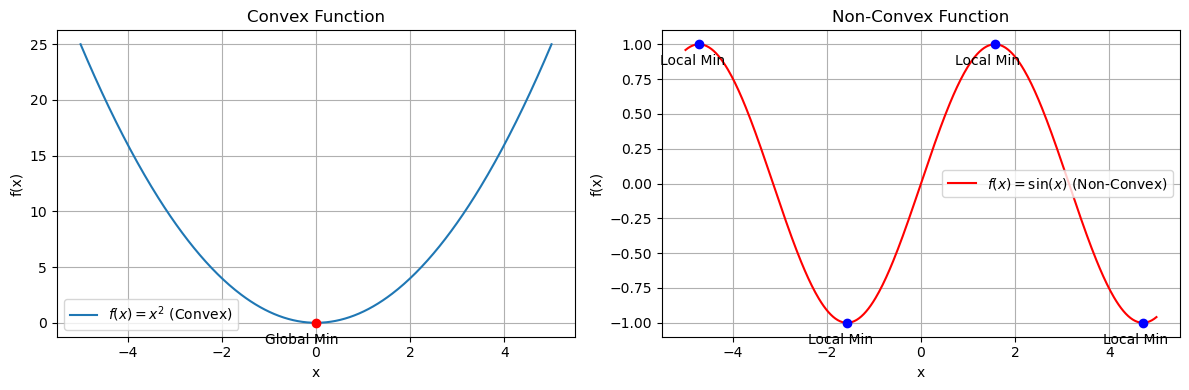

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define functions
x = np.linspace(-5, 5, 400)
convex_func = x**2
nonconvex_func = np.sin(x)

# Find minima for convex (single global min at x=0)
convex_min_x = 0
convex_min_y = convex_min_x**2

# For non-convex (local minima)
local_minima_x = [-3*np.pi/2, -np.pi/2, np.pi/2, 3*np.pi/2]  # approximate within range
local_minima_x = [val for val in local_minima_x if -5 <= val <= 5]
local_minima_y = [np.sin(val) for val in local_minima_x]

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Convex function plot
axes[0].plot(x, convex_func, label=r"$f(x) = x^2$ (Convex)")
axes[0].scatter(convex_min_x, convex_min_y, color='red', zorder=5)
axes[0].annotate("Global Min", (convex_min_x, convex_min_y), textcoords="offset points", xytext=(-10,-15), ha='center')
axes[0].set_title("Convex Function")
axes[0].set_xlabel("x")
axes[0].set_ylabel("f(x)")
axes[0].legend()
axes[0].grid(True)

# Non-convex function plot
axes[1].plot(x, nonconvex_func, label=r"$f(x) = \sin(x)$ (Non-Convex)", color="red")
axes[1].scatter(local_minima_x, local_minima_y, color='blue', zorder=5)
for xi, yi in zip(local_minima_x, local_minima_y):
    axes[1].annotate("Local Min", (xi, yi), textcoords="offset points", xytext=(-5,-15), ha='center')
axes[1].set_title("Non-Convex Function")
axes[1].set_xlabel("x")
axes[1].set_ylabel("f(x)")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


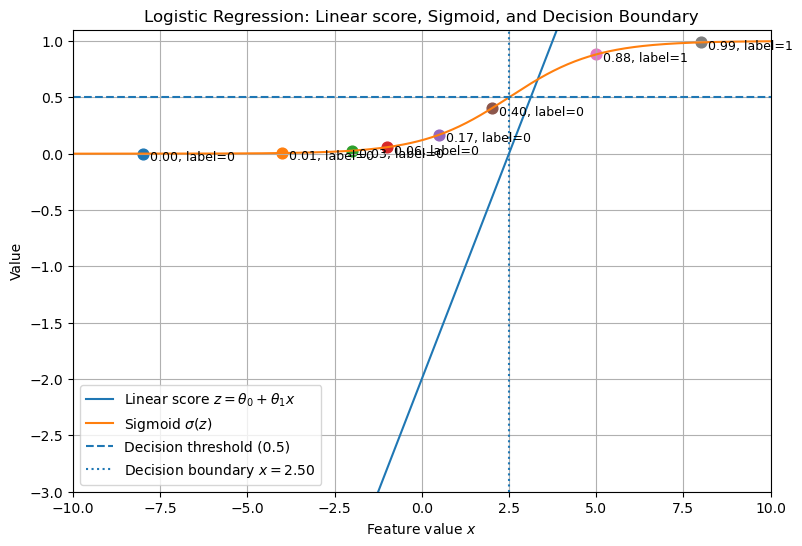

In [2]:
# Generating a single plot showing the linear score z, its sigmoid, and decision boundary.
import numpy as np
import matplotlib.pyplot as plt

# Parameters
theta0 = -2.0
theta1 = 0.8

# Input range
x = np.linspace(-10, 10, 400)
z = theta0 + theta1 * x
sigmoid = 1 / (1 + np.exp(-z))

# Sample points to illustrate classification
x_samples = np.array([-8, -4, -2, -1, 0.5, 2, 5, 8])
z_samples = theta0 + theta1 * x_samples
probs_samples = 1 / (1 + np.exp(-z_samples))
labels = (probs_samples >= 0.5).astype(int)

plt.figure(figsize=(9,6))
plt.plot(x, z, label='Linear score $z=\\theta_0+\\theta_1 x$')
plt.plot(x, sigmoid, label='Sigmoid $\\sigma(z)$')
plt.axhline(0.5, linestyle='--', label='Decision threshold (0.5)')
# Decision boundary where z = 0 -> x = -theta0/theta1
x_boundary = -theta0 / theta1
plt.axvline(x_boundary, linestyle=':', label=f'Decision boundary $x={x_boundary:.2f}$')

# Plot sample points and their probabilities
for xi, pi, li in zip(x_samples, probs_samples, labels):
    plt.scatter([xi], [pi], s=60)
    plt.text(xi + 0.2, pi - 0.06, f'{pi:.2f}, label={li}', fontsize=9)

plt.xlabel('Feature value $x$')
plt.ylabel('Value')
plt.title('Logistic Regression: Linear score, Sigmoid, and Decision Boundary')
plt.legend()
plt.grid(True)
plt.ylim(-3, 1.1)
plt.xlim(x.min(), x.max())
plt.show()


### **Why Linear Regression Fails for Classification**

1. **Outliers:** The best-fit line can be heavily influenced by extreme values.
2. **Output Range:** Linear regression can produce outputs less than 0 or greater than 1, which are invalid for probabilities.

---

### **Solution: Logistic Regression**

* Apply a **squashing function** to the linear output to constrain predictions between 0 and 1.
* The **sigmoid (logistic) function** is used:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

**Key properties:**

* Outputs always between 0 and 1.

* Midpoint at 0.5 when $z = 0$.

* If $z > 0$, $\sigma(z) > 0.5$.

* **Hypothesis function with sigmoid:**

$$
h_\theta(x) = \sigma(\theta_0 + \theta_1 x_1)
$$

* For multiple features:

$$
h_\theta(x) = \sigma(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots)
$$

---

### **Cost Function**

* Linear regression cost function leads to **non-convexity** when combined with sigmoid, causing **local minima**.
* Logistic regression uses **log loss (cross-entropy)** for convexity:

$$
\text{Cost}(h_\theta(x), y) =
\begin{cases} 
- \log(h_\theta(x)) & \text{if } y = 1 \\
- \log(1 - h_\theta(x)) & \text{if } y = 0
\end{cases}
$$

* Combined form:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \big[ y^{(i)} \log(h_\theta(x^{(i)})) + (1-y^{(i)}) \log(1-h_\theta(x^{(i)})) \big]
$$

* Ensures **convexity**, allowing gradient descent to reliably find the **global minimum**.

---

### **Gradient Descent**

* Parameter update rule:

$$
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
$$

* Repeat until convergence.
* For multiple features, update each $\theta_j$ in the same way.

---

### **Summary**

1. Fit a linear model: $\theta_0 + \theta_1 x_1 + \dots$
2. Apply **sigmoid activation** to squash outputs between 0 and 1.
3. Use **log loss** to ensure a convex cost function.
4. Optimize parameters using **gradient descent**.
5. Predictions can now be interpreted as **probabilities** for classification.

